## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

# Combine the data into a single dataset
#wrestlers1_df = pd.merge(wrestlers_2013_df, wrestlers_2014_df, how='outer', on=("Wrestler"), suffixes=('_2013', '_2014'))
pyma_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#study_results

In [3]:
# Checking the number of mice.
micecount = pyma_df["Mouse ID"].nunique()
micecount

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = pyma_df.groupby(["Mouse ID", "Timepoint"]).count()["Sex"]
mice_dup.loc[mice_dup>1]


Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Sex, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
pyma_df.loc[pyma_df["Mouse ID"]=="g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clpyma_df = pyma_df.loc[pyma_df["Mouse ID"]!="g989"]
clpyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
micecount = clpyma_df["Mouse ID"].nunique()
micecount

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#tumorv = clpyma_df["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
pyma_drug = clpyma_df.groupby(["Drug Regimen"])




In [9]:
#tumorv = pyma_drug["Tumor Volume (mm3)"]
#print(tumorv)
drug_mean = pyma_drug["Tumor Volume (mm3)"].mean()
drug_median = pyma_drug["Tumor Volume (mm3)"].median()
tumorv = pyma_drug["Tumor Volume (mm3)"]
var_numpy = tumorv.var()
print(f"The tumor volume variance using the NumPy module is {var_numpy}")

sd_numpy = tumorv.std()
print(f"The tumor volume standard deviation using the NumPy module is {sd_numpy}")

tvsem = tumorv.sem()
print(f"The SEM value for the Tumor Volume data is {tumorv.sem()}")

The tumor volume variance using the NumPy module is Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
The tumor volume standard deviation using the NumPy module is Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64
The SEM value for the Tumor Volume data is Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [10]:

#summary_tumorv_df=summary_tumorv_df.set_index('Drug Regimen')
summary_tumorv_df = pd.DataFrame({"Tumor Volume Mean":drug_mean,"Tumor Volume Median":drug_median,"Tumor Volume Variance":var_numpy,"Tumor Volume Standard Deviation":sd_numpy, "Tumor Volume SEM":tvsem})

#summary_tumorv_df["Tumor Volume Mean"] = summary_tumorv_df["Tumor Volume Mean"].astype(float).map("{:,.2f}".format)
#summary_tumorv_df["Tumor Volume Variance"] = summary_tumorv_df["Tumor Volume Variance"].astype(float).map("{:,.2f}".format)
#summary_tumorv_df["Tumor Volume Median"] = summary_tumorv_df["Tumor Volume Median"].astype(float).map("{:,.2f}".format)
#summary_tumorv_df["Tumor Volume Standard Deviation"] = summary_tumorv_df["Tumor Volume Standard Deviation"].astype(float).map("{:,.2f}".format)
#summary_tumorv_df["Tumor Volume SEM"] = summary_tumorv_df["Tumor Volume SEM"].astype(float).map("{:,.2f}".format)
 


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tumorv_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# Using the aggregation method, produce the same summary statistics in a single line
#print(summary_tumorv_df.agg("mean", axis="rows"))            
pyma_drug.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
print(summary_tumorv_df.agg("median", axis="rows"))

Tumor Volume Mean                  53.060651
Tumor Volume Median                51.819532
Tumor Volume Variance              46.192684
Tumor Volume Standard Deviation     6.794337
Tumor Volume SEM                    0.530365
dtype: float64


In [14]:
#after printing both mean and median, median appears to be the better representation of the data. 
summary_tumorv_df.agg(['median'])


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
median,53.060651,51.819532,46.192684,6.794337,0.530365


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements Taken by Drug Regimen')

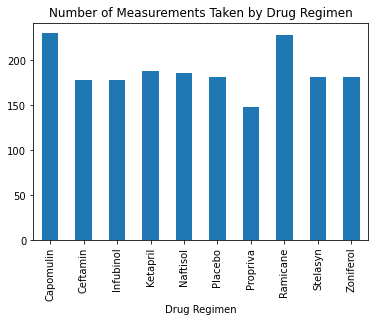

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimencount=pyma_drug["Timepoint"].count()
regimencount.plot(kind="bar")
plt.title("Number of Measurements Taken by Drug Regimen")


In [47]:
pyma_drugcount_df=pyma_drug.count()
pyma_drugcount_df


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


Text(0, 0.5, 'Number of Measurements')

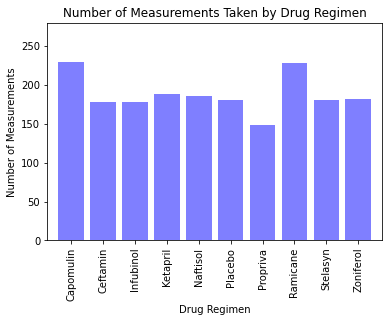

In [54]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = pyma_drugcount_df.index
y_axis = pyma_drugcount_df["Sex"]
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
plt.xticks(x_axis, x_axis, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+50)
plt.title("Number of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
